# DataSet Selection

After a long time search for dataset that can help in developing a model to recommend courses based on the user activity and responses, I finally able to find a set of datasets that collboratively help to develop this project

# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [5]:
course_genre = pd.read_csv('data\course_genre.csv')

In [6]:
course_genre.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [8]:
# No of unique courses we have in the dataset
course_genre.shape[0]

307

In [9]:
course_genre.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [10]:
course_genre.describe()

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.195440,0.091205,0.120521,0.182410,0.055375,0.224756,0.032573,0.123779,0.117264,0.013029,0.055375,0.254072,0.061889,0.013029
std,0.397186,0.288371,0.326102,0.386813,0.229083,0.418103,0.177807,0.329866,0.322260,0.113585,0.229083,0.436049,0.241348,0.113585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
course_genre.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [12]:
course_genre.isna().sum()

COURSE_ID          0
TITLE              0
Database           0
Python             0
CloudComputing     0
DataAnalysis       0
Containers         0
MachineLearning    0
ComputerVision     0
DataScience        0
BigData            0
Chatbot            0
R                  0
BackendDev         0
FrontendDev        0
Blockchain         0
dtype: int64

# Feature Engineering

**Plot Word Cloud from Course Titles**

In [13]:
titles = " ".join(title for title in course_genre['TITLE'].astype(str))

In [14]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "enabling", "template", "end", "university", "using", "introduction"])

In [19]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400)

In [21]:
wordcloud.generate(titles)

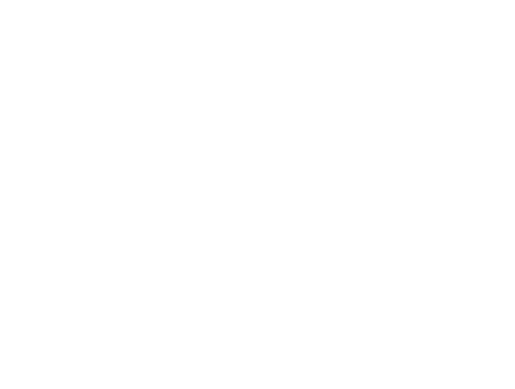

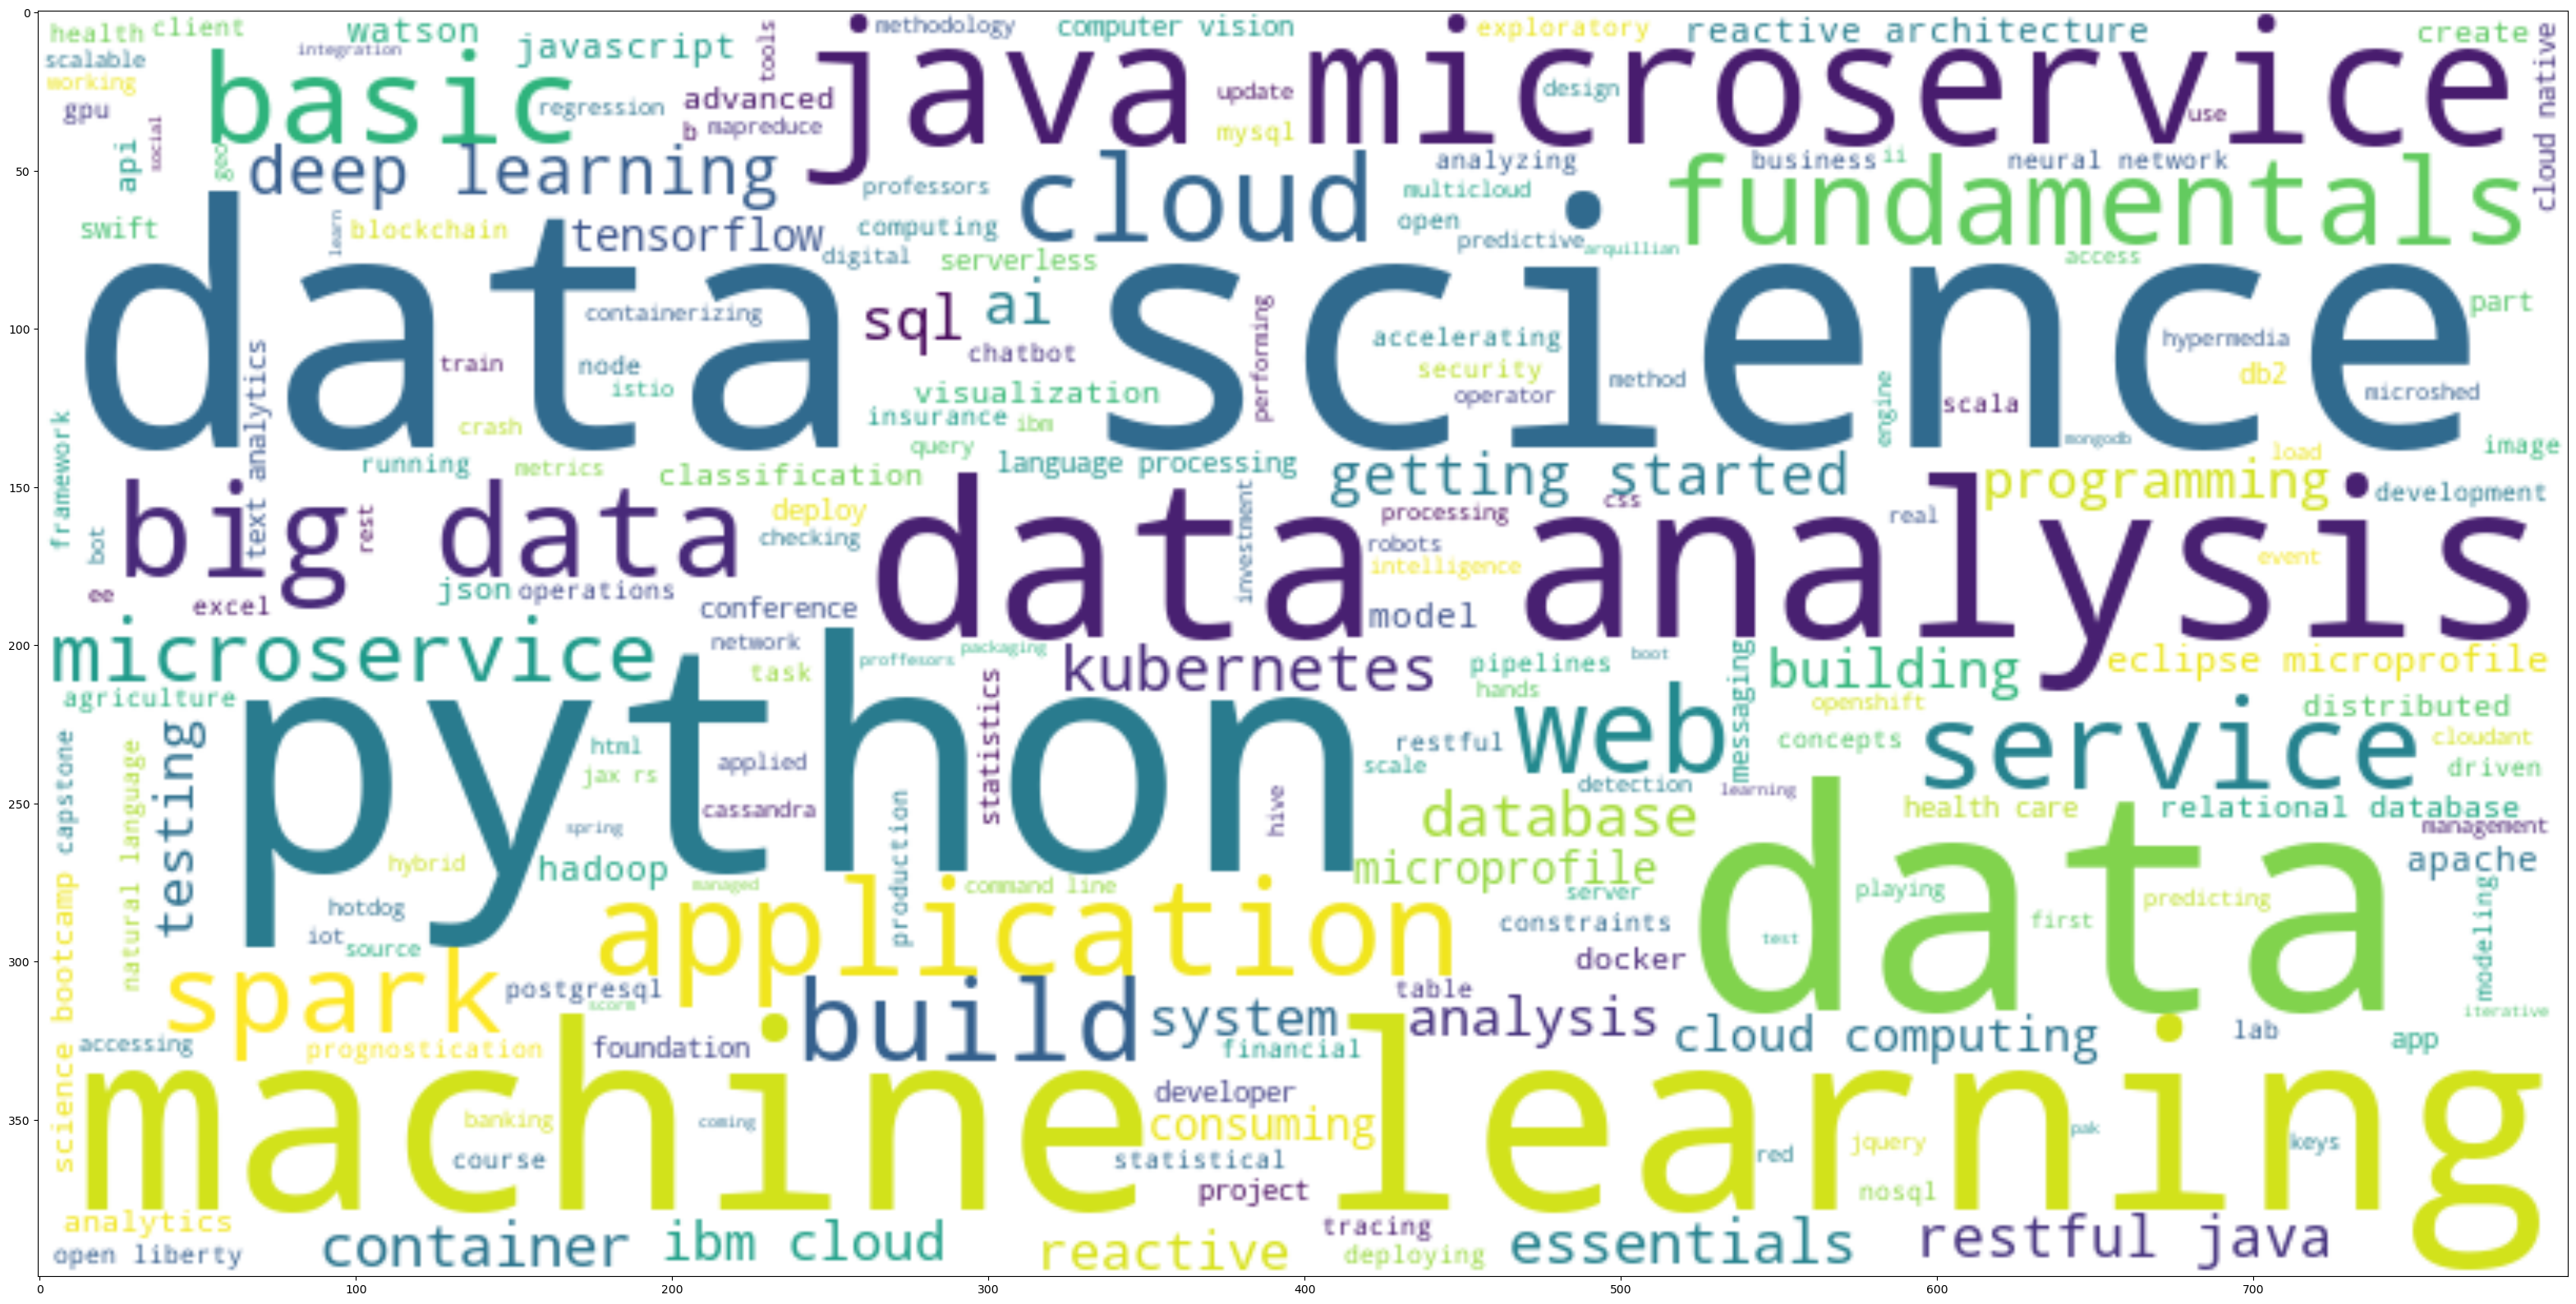

In [22]:
plt.axis('off')
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

We can see from the wordcloud there are many popular IT related domains like machine learning, python, data analysis, data science, cloud etc. We can say the courses in the dataset are more focused on IT domains

In [23]:
genres = course_genre.columns[2:]

In [24]:
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [28]:
x = pd.DataFrame(course_genre.sum()).iloc[2:, : ].reset_index().rename(columns={'index':'Skills',0:'count'})
x

,Skills,count
0,Database,60
1,Python,28
2,CloudComputing,37
3,DataAnalysis,56
4,Containers,17
5,MachineLearning,69
6,ComputerVision,10
7,DataScience,38
8,BigData,36
9,Chatbot,4


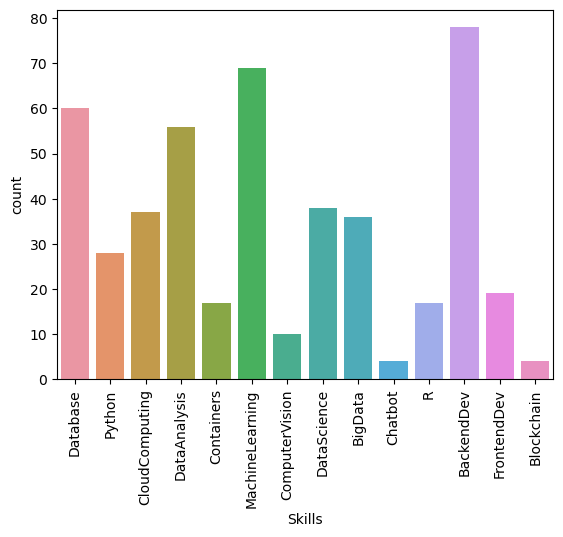

In [31]:
sns.barplot(data=x, x="Skills", y="count")
plt.xticks(rotation=90)
plt.show()

In [33]:
rating = pd.read_csv('data/ratings.csv')

In [34]:
rating.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [36]:
rating['rating'].unique()

array([3., 2.])

In [37]:
rating.describe()

,user,rating
count,2.334420e+05,233442.000000
mean,1.099747e+06,2.952982
std,4.776417e+05,0.211678
min,2.000000e+00,2.000000
25%,7.211040e+05,3.000000
50%,1.080471e+06,3.000000
75%,1.467241e+06,3.000000
max,2.103075e+06,3.000000


In [38]:
rating.shape[0]

233442

In [39]:
user_count = rating.groupby('user').size()
user_count

user
2          61
4          44
5          59
7           1
8           3
           ..
2103071    10
2103072    10
2103073     3
2103074     3
2103075     3
Length: 33937, dtype: int64

In [40]:
user_count.describe()

count    33937.000000
mean         6.878687
std          5.822065
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

<Axes: >

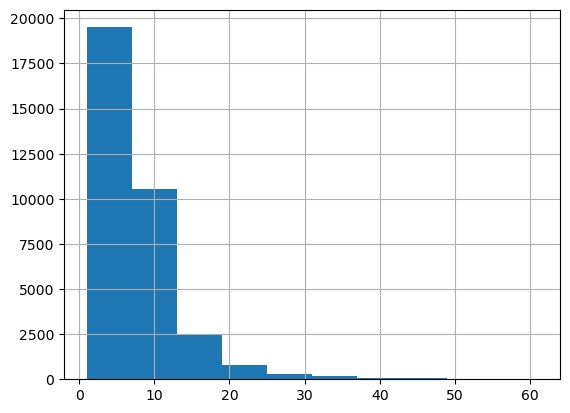

In [41]:
user_count.hist()

# Building ML Model

In [44]:
user_interest = pd.read_csv('data/user_profile.csv')

In [45]:
user_interest.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [46]:
user_interest.columns

Index(['user', 'Database', 'Python', 'CloudComputing', 'DataAnalysis',
       'Containers', 'MachineLearning', 'ComputerVision', 'DataScience',
       'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [181]:
feature_names = list(user_interest.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [182]:
user_interest.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


The original user profile feature vector is not normalized, which may cause issues when we perform clustering and Principal component analysis (PCA), therefor we standardize the data.

In [184]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [186]:
# Use StandardScaler to make each feature with mean 0, standard deviation 1
scaler = StandardScaler()
user_interest[feature_names] = scaler.fit_transform(user_interest[feature_names])
print("mean {} and standard deviation{} ".format(user_interest[feature_names].mean(),user_interest[feature_names].std()))

mean Database          -1.341398e-17
Python             4.108032e-17
CloudComputing    -2.137853e-17
DataAnalysis      -2.263609e-17
Containers         2.934308e-17
MachineLearning    5.700942e-17
ComputerVision    -2.515121e-18
DataScience       -8.383738e-18
BigData           -1.676748e-18
Chatbot           -6.203966e-17
R                 -4.841609e-17
BackendDev         1.383317e-17
FrontendDev        4.673934e-17
Blockchain        -5.281755e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [187]:
user_interest.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-1.341398e-17,4.108032e-17,-2.137853e-17,-2.263609e-17,2.934308e-17,5.700942e-17,-2.515121e-18,-8.383738e-18,-1.676748e-18,-6.203966e-17,-4.841609e-17,1.383317e-17,4.673934e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [191]:
features = user_interest.loc[:, user_interest.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [192]:
user_ids = user_interest.loc[:, user_interest.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


# Perform K-means clustering algorithm on the user profile feature vectors

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

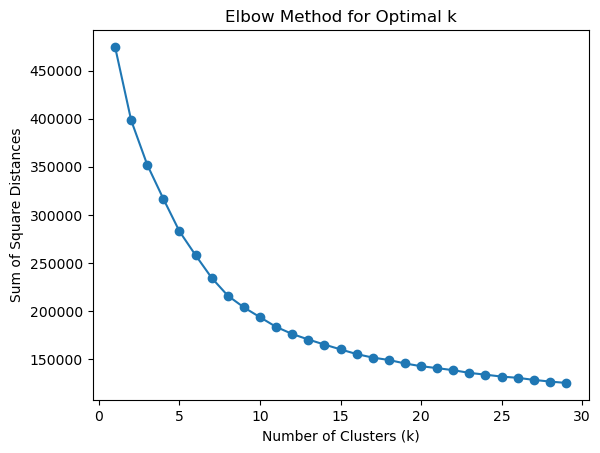

In [194]:
# Find an optimized number of neighors k from a candidate list such as list_k = list(range(1, 30))
list_k = list(range(1, 30))

# List to hold the sum of square distances for each fitted model
sum_of_squares = []

# Grid search for the optimized number of clusters
for k in list_k:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features)
    sum_of_squares.append(model.inertia_)

# Plotting the sum of square distances against the number of clusters
plt.plot(list_k, sum_of_squares, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

From the elbow plot, we should visually identify the point where the metric starting to be flatten, which indicates the optimized number of clusters.

Once we have identified the best number of clusters, we can apply KMeans() again to generate cluster label for all users.

In [195]:
cluster_labels = [None] * len(user_ids)

In [197]:
optimal_k = 20

# Apply KMeans with the optimized number of clusters
model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(features)

# Get the cluster labels for all users
cluster_labels = model.labels_

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [198]:
cluster_labels

array([10, 10,  4, ...,  7,  1,  1])

The cluster labels we generated is a list of integers indicating cluster indices. We may use the following utility method to combine the cluster labels and user ids to a dataframe, so that you know which cluster a user belongs:

In [199]:
def combine_cluster_labels(user_ids, labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [200]:
cluster_df = combine_cluster_labels(user_ids, cluster_labels)
display(cluster_df)

,user,cluster
0,2,10
1,4,10
2,5,4
3,7,1
4,8,1
...,...,...
33896,2102054,14
33897,2102356,1
33898,2102680,7
33899,2102983,1


# Apply PCA on user profile feature vectors to reduce dimensions

In [203]:
features = user_interest.loc[:, user_interest.columns != 'user']
user_ids = user_interest.loc[:, user_interest.columns == 'user']
feature_names = list(user_interest.columns[1:])

In [204]:
print(f"There are {len(feature_names)} features for each user profile.")

There are 14 features for each user profile.


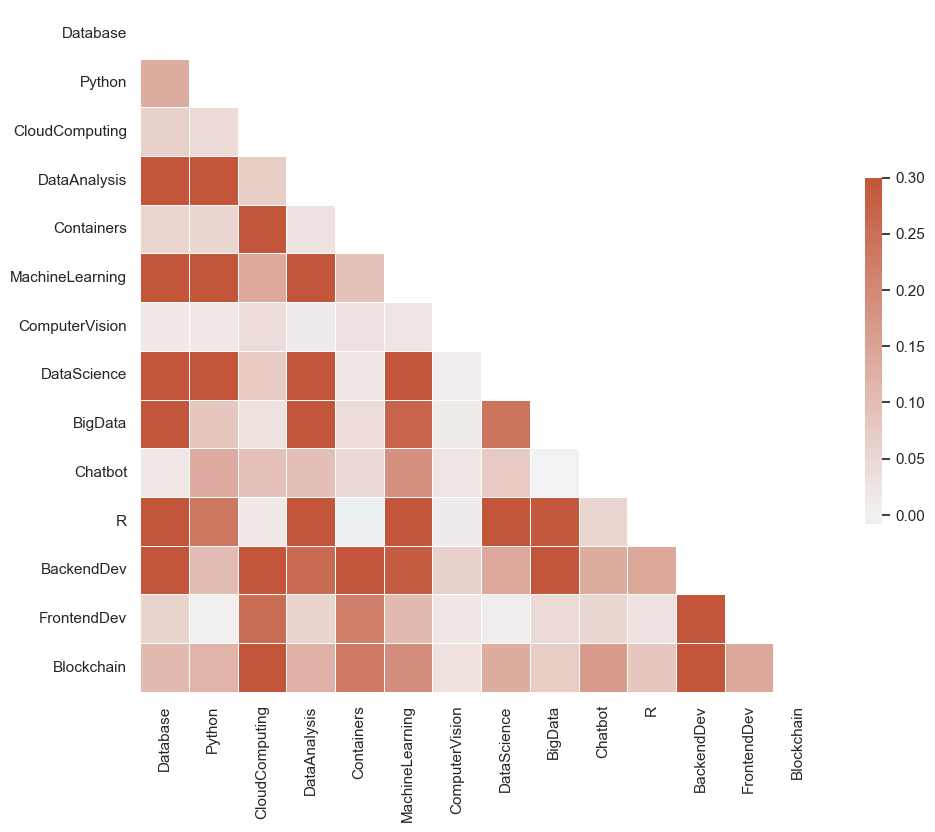

In [205]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

For example, the feature **MachineLearning** and the feature **DataScience** are correlated. Such covariances among features may indicate that we can apply PCA to find its main components (eigenvectors with max eigenvalues on the covariance matrix).

If we only keep the independent main components, then we can reduce the dimensions of our user profile feature vectors.

Now let's apply the **PCA()** provided by **scikit-learn** to find the main components in user profile feature vectors and see if we can reduce its dimensions by only keeping the main components.

Note that when calling the **PCA()** class, there is also an import argument called **n_components** which indicates how many components you want to keep in the PCA result. One way to find an optimized **n_components** is to do a grid search on a list of argument candidates (such as range(1, 15)) and calculate the ratio of the accumulated variance for each candidate.

If the accumulated variances ratio of a candidate n_components is larger than a threshold, e.g., 90%, then we can say the transformed n_components could explain about 90% of variances of the original data variance and can be considered as an optimized components size.

In [206]:
list_components = list(range(1, 15))

# Find the optimized number of components
for component in list_components:
    pca = PCA(n_components=component)
    pca.fit_transform(features)
    
    # Calculate the accumulated variance ratio
    accumulated_variance_ratio = np.sum(pca.explained_variance_ratio_)
    
    # Check if accumulated variance ratio is at least 90%
    if accumulated_variance_ratio >= 0.9:
        optimal_n_components = component
        break

print("Optimal number of components:", optimal_n_components)

Optimal number of components: 9


In [207]:
pca = PCA(n_components=optimal_n_components)
transformed_data = pca.fit_transform(features)

# Create a DataFrame with the transformed features
transformed_df = pd.DataFrame(data=transformed_data, index=features.index, columns=[f'PC{i}' for i in range(1, optimal_n_components + 1)])

# Merge the user ids and transformed features into a new dataframe
result_df = pd.merge(user_ids, transformed_df, left_index=True, right_index=True)

# Display the result
display(result_df)

,user,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,4,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,5,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,7,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,8,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...,...
33896,2102054,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,2102356,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,2102680,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,2102983,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


# Perform k-means clustering on the PCA transformed feature vectors

Now, we have the PCA components of the original profile vectors. We can perform k-means on them again:

In [209]:
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(result_df)

# Assign each user a cluster label
cluster_df['Cluster_new'] = cluster_labels

# Display the result
display(cluster_df)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user,cluster,Cluster_new
0,2,10,8
1,4,10,8
2,5,4,8
3,7,1,8
4,8,1,8
...,...,...,...
33896,2102054,14,7
33897,2102356,1,7
33898,2102680,7,7
33899,2102983,1,7


Great, now all users find their learning interest groups, either based on their original or the PCA transformed user profile features.

When a user is in a group or a community, it is very likely that the user will be interested in the courses enrolled by other members within the same group.

# Generate course recommendations based on the popular courses in the same cluster

In [210]:
test_user_df = pd.read_csv('data/rs_content_test.csv')

In [211]:
test_user_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [213]:
test_users_labelled = pd.merge(test_user_df, cluster_df, left_on='user', right_on='user')
display(test_users_labelled)

,user,item,rating,cluster,Cluster_new
0,1502801,RP0105EN,3.0,0,6
1,1502801,BD0131EN,3.0,0,6
2,1502801,BD0212EN,3.0,0,6
3,1502801,BD0115EN,3.0,0,6
4,1502801,BD0211EN,3.0,0,6
...,...,...,...,...,...
9397,630511,BD0121EN,3.0,3,12
9398,630511,SC0101EN,3.0,3,12
9399,630511,BD0111EN,3.0,3,12
9400,630511,BD0115EN,3.0,3,12


In [214]:
courses_cluster = test_users_labelled[['item', 'cluster']]
courses_cluster['count'] = [1] * len(courses_cluster)
courses_cluster = courses_cluster.groupby(['cluster','item']).agg(enrollments = ('count','sum')).reset_index()
courses_cluster

C:\conda_tmp\ipykernel_12804\1191581159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses_cluster['count'] = [1] * len(courses_cluster)


,cluster,item,enrollments
0,0,AI0111EN,1
1,0,BC0101EN,7
2,0,BD0101EN,26
3,0,BD0111EN,34
4,0,BD0115EN,30
...,...,...,...
1216,19,SW0201EN,1
1217,19,TA0105,1
1218,19,TA0105EN,5
1219,19,TA0106EN,1


In [216]:
courses_cluster.dtypes

cluster         int32
item           object
enrollments     int64
dtype: object

In [219]:
popular_threshold = 10

# Iterate over each test user
for user_id in test_users_labelled['user'].unique():
    # Create a subset of the test_users_labelled DataFrame for the current user
    user_subset = test_users_labelled[test_users_labelled['user'] == user_id]
    
    # Get the enrolled courses for the current user
    enrolled_courses = set(user_subset['item'])
    
    # Get the cluster label for the current user
    cluster_id = user_subset['cluster'].iloc[0]
    
    # Find all courses in the same cluster
    courses_in_cluster = set(test_users_labelled[test_users_labelled['cluster'] == cluster_id]['item'])
    
    # Find new/unseen courses for the user
    unseen_courses = courses_in_cluster.difference(enrolled_courses)
    
    # Filter popular courses among the unseen courses
    popular_unseen_courses = set(courses_cluster[(courses_cluster['item'].isin(unseen_courses)) & (courses_cluster['enrollments'] >= popular_threshold)]['item'] )

    # Recommend popular unseen courses to the user
    recommendation_results = popular_unseen_courses.intersection(unseen_courses)
    
    # Print or use the recommendation results as needed
    print(f'Recommend courses for user {user_id}: {recommendation_results}')

Recommend courses for user 1502801: {'ML0120ENv2', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'DV0151EN', 'ML0103EN', 'DS0105EN', 'DA0101EN', 'DS0321EN', 'ML0101ENv3', 'ML0120EN', 'ST0101EN', 'CB0103EN', 'DS0101EN', 'DB0101EN', 'SC0103EN', 'PY0101EN', 'LB0101ENv1', 'CO0301EN', 'BD0143EN', 'DV0101EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'DB0151EN', 'RP0103EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1609720: {'CC0201EN', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'DS0105EN', 'ML0120EN', 'ST0101EN', 'BD0141EN', 'DB0101EN', 'PY0101EN', 'BC0201EN', 'CO0301EN', 'BD0101EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'BD0131EN', 'DB0151EN', 'ML0122ENv1', 'CO0101EN', 'LB0105ENv1', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1347188: {'CC0201EN', '

Recommend courses for user 497128: {'CC0201EN', 'ML0120ENv2', 'CL0101EN', 'BD0145EN', 'CC0103EN', 'RP0105EN', 'CC0101EN', 'BD0211EN', 'DS0321EN', 'DA0101EN', 'ML0101ENv3', 'ST0101EN', 'DB0101EN', 'CO0301EN', 'DV0101EN', 'BD0115EN', 'BD0123EN', 'SC0101EN', 'ML0101EN', 'DB0151EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1886079: {'CC0201EN', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'DS0321EN', 'ML0120EN', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'DAI101EN', 'CB0103EN', 'DB0101EN', 'DE0205EN', 'BC0201EN', 'CO0301EN', 'BD0101EN', 'BD0143EN', 'BD0115EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'ML0101EN', 'BD0131EN', 'DB0151EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 899349: {'CC0201EN', 'ML0120ENv2', 'BD0121EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'BD0111EN', 'BD02

Recommend courses for user 777750: {'CC0201EN', 'ML0120ENv2', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'CC0103EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'CC0250EN', 'DS0105EN', 'DA0101EN', 'ML0101ENv3', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'DAI101EN', 'CB0103EN', 'DB0101EN', 'SC0103EN', 'DE0205EN', 'BC0201EN', 'LB0101ENv1', 'CO0301EN', 'CO0401EN', 'BD0101EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0115EN', 'DB0151EN', 'CNSC02EN', 'LB0105ENv1', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1169698: {'ML0120ENv2', 'BD0121EN', 'BC0101EN', 'RP0105EN', 'DS0321EN', 'DA0101EN', 'ML0101ENv3', 'BD0221EN', 'ML0120EN', 'ST0101EN', 'BD0141EN', 'LB0101ENv1', 'CO0301EN', 'DV0101EN', 'BD0101EN', 'BD0143EN', 'RP0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'DB0151EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1342117: {'CC0201EN', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BD0145EN'

Recommend courses for user 362955: {'CC0201EN', 'ML0120ENv2', 'BD0121EN', 'DS0301EN', 'BD0145EN', 'DV0151EN', 'CC0101EN', 'CC0250EN', 'DS0105EN', 'DS0321EN', 'ML0101ENv3', 'ML0120EN', 'ST0101EN', 'CB0103EN', 'DB0101EN', 'SC0103EN', 'BC0201EN', 'LB0101ENv1', 'CO0401EN', 'BD0143EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'BD0123EN', 'SC0101EN', 'ML0101EN', 'ML0115EN', 'BD0131EN', 'DB0151EN', 'RP0103EN', 'ML0122ENv1', 'CNSC02EN', 'LB0105ENv1', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 998681: {'ML0120ENv2', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'CC0250EN', 'DS0105EN', 'DA0101EN', 'ML0101ENv3', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'DAI101EN', 'CB0103EN', 'DS0101EN', 'DB0101EN', 'SC0103EN', 'DE0205EN', 'PY0101EN', 'BC0201EN', 'LB0101ENv1', 'CO0301EN', 'CO0401EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0115EN', 'DB0151EN', 'CNSC02EN', 'CO0101EN', 'LB0105ENv1', 'ML0151EN', 'WA0101EN'}
Recommend courses for 

Recommend courses for user 1632349: {'CC0201EN', 'BD0121EN', 'CL0101EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'LB0107ENv1', 'BD0111EN', 'BD0211EN', 'CC0250EN', 'DS0321EN', 'DA0101EN', 'ML0101ENv3', 'ML0120EN', 'ST0101EN', 'BD0141EN', 'DAI101EN', 'CB0103EN', 'DE0205EN', 'PY0101EN', 'BC0201EN', 'LB0101ENv1', 'CO0301EN', 'CO0401EN', 'BD0101EN', 'DV0101EN', 'BD0115EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'BD0131EN', 'DB0151EN', 'RP0103EN', 'CNSC02EN', 'CO0201EN', 'CO0101EN', 'LB0105ENv1', 'LB0103ENv1', 'WA0101EN'}
Recommend courses for user 1343288: {'CL0101EN', 'DS0301EN', 'CC0103EN', 'RP0105EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'DS0105EN', 'DA0101EN', 'DS0321EN', 'BD0221EN', 'ML0120EN', 'BD0212EN', 'ST0101EN', 'DS0101EN', 'DB0101EN', 'DE0205EN', 'BD0101EN', 'PA0101EN', 'DS0103EN', 'ML0101EN', 'BD0131EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN'}
Recommend courses for user 1088239: {'CC0201EN', 'BD0121EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', '

Recommend courses for user 1167861: {'CC0201EN', 'ML0120ENv2', 'CL0101EN', 'BC0101EN', 'CC0103EN', 'RP0105EN', 'CC0101EN', 'BD0111EN', 'BD0211EN', 'DS0105EN', 'DA0101EN', 'ML0101ENv3', 'BD0221EN', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'CB0103EN', 'DS0101EN', 'DB0101EN', 'SC0103EN', 'PY0101EN', 'BC0201EN', 'CO0301EN', 'CO0401EN', 'BD0101EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'SC0101EN', 'DS0103EN', 'ML0115EN', 'BD0131EN', 'CNSC02EN', 'CO0201EN', 'CO0101EN'}
Recommend courses for user 784286: {'CC0201EN', 'ML0120ENv2', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BC0101EN', 'CC0103EN', 'RP0105EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'CC0250EN', 'DS0105EN', 'DA0101EN', 'ML0101ENv3', 'BD0141EN', 'CB0103EN', 'DS0101EN', 'SC0103EN', 'BC0201EN', 'CO0301EN', 'CO0401EN', 'BD0101EN', 'DV0101EN', 'BD0115EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'BD0131EN', 'DB0151EN', 'CO0101EN', 'ML0151EN', 'WA0101EN'}
Recommend courses for user 1072153: {'CC0201EN', 'ML012

Recommend courses for user 884271: {'CC0201EN', 'ML0120ENv2', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'ML0103EN', 'BD0211EN', 'CC0250EN', 'DS0105EN', 'DA0101EN', 'DS0321EN', 'ML0101ENv3', 'ML0120EN', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'DS0101EN', 'DB0101EN', 'SC0103EN', 'DE0205EN', 'PY0101EN', 'BC0201EN', 'LB0101ENv1', 'CO0301EN', 'CO0401EN', 'BD0143EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'DB0151EN', 'ML0122ENv1', 'CO0201EN', 'CO0101EN', 'ML0151EN'}
Recommend courses for user 1868084: {'CC0201EN', 'ML0120ENv2', 'CL0101EN', 'BC0101EN', 'CC0103EN', 'RP0105EN', 'LB0107ENv1', 'BD0111EN', 'BD0211EN', 'DS0105EN', 'DA0101EN', 'ML0101ENv3', 'BD0221EN', 'BD0212EN', 'BD0141EN', 'ST0101EN', 'CB0103EN', 'SC0103EN', 'PY0101EN', 'BC0201EN', 'LB0101ENv1', 'CO0301EN', 'CO0401EN', 'DV0101EN', 'BD0115EN', 'RP0101EN', 'SC0101EN', 'ML0115EN', 'BD0131EN', 'CNSC02EN', 'CO0201EN'}
Recommend courses for u

In [220]:
# Recommendation for user_id 1609720
user_id = 1609720
user_subset = test_users_labelled[test_users_labelled['user'] == user_id]
    
# Get the enrolled courses for the current user
enrolled_courses = set(user_subset['item'])
    
# Get the cluster label for the current user
cluster_id = user_subset['cluster'].iloc[0]
    
# Find all courses in the same cluster
courses_in_cluster = set(test_users_labelled[test_users_labelled['cluster'] == cluster_id]['item'])
    
# Find new/unseen courses for the user
unseen_courses = courses_in_cluster.difference(enrolled_courses)
    
# Filter popular courses among the unseen courses
popular_unseen_courses = set(courses_cluster[(courses_cluster['item'].isin(unseen_courses)) & (courses_cluster['enrollments'] >= popular_threshold)]['item'] )

# Recommend popular unseen courses to the user
recommendation_results = popular_unseen_courses.intersection(unseen_courses)
    
# Print or use the recommendation results as needed
print(f'Recommend courses for user {user_id}: {recommendation_results}')

Recommend courses for user 1609720: {'CC0201EN', 'BD0121EN', 'CL0101EN', 'DS0301EN', 'BD0145EN', 'BC0101EN', 'CC0103EN', 'DV0151EN', 'CC0101EN', 'ML0103EN', 'BD0111EN', 'BD0211EN', 'DS0105EN', 'ML0120EN', 'ST0101EN', 'BD0141EN', 'DB0101EN', 'PY0101EN', 'BC0201EN', 'CO0301EN', 'BD0101EN', 'RP0101EN', 'PA0101EN', 'BD0123EN', 'SC0101EN', 'DS0103EN', 'ML0101EN', 'ML0115EN', 'BD0131EN', 'DB0151EN', 'ML0122ENv1', 'CO0101EN', 'LB0105ENv1', 'ML0151EN', 'WA0101EN'}
